# Names of the Colobarators
*  Kaamala Lalith Sai Reddy
*  Kaushik Mantha
*  Preeth Nath Manjunath
*  Vineel Rayapati
*  Harshitha Konduru
*  Saketh Saridena

### Here is the link to our github repository:  https://github.com/saketh-saridena/HealthCare-DSAF-Project

# About the data set
This is a table of data about patients with cancer. Each row is a record of one patient.

1. `BCRPATIENTBARCODE`: This is a unique code for each patient.
2. `AgeAtDiagnosis (yrs)`: This shows the age of the patient when they were diagnosed with cancer.
3. `VITALSTATUS`: This tells whether the patient is alive or not.
4. `TUMORSTAGE`: This tells how advanced the cancer is.
5. `TUMORGRADE`: This shows how abnormal the cancer cells are.
6. `TUMORRESIDUALDISEASE`: This tells if some cancer remains after treatment.
7. `PRIMARYTHERAPYOUTCOMESUCCESS`: This shows the result of the primary treatment.
8. `PERSONNEOPLASMCANCERSTATUS`: This tells the current cancer status of the patient.
9. `OverallSurvival(mos)`: This is the survival time in months since diagnosis.
10. `ProgressionFreeStatus`: This tells if the cancer has progressed or not.
11. `ProgressionFreeSurvival (mos)#`: This is the time in months the patient lived without cancer progressing.
12. `PlatinumFreeInterval (mos)*`: This is the time in months the patient lived without needing a specific treatment.
13. `PlatinumStatus`: This gives information about the patient's response to a specific treatment.

The rest of the table has similar data for many patients, and some data like `PlatinumFreeInterval (mos)*` and `PlatinumStatus` have values like "Tooearly" which likely means it's too early to measure or evaluate those factors.

The information here can help doctors and researchers understand how different factors like age or treatment affect cancer patients' survival and disease progression.

# Statement of the Question of Interest:

The data provided enumerates comprehensive patient profiles from a cancer registry, including their diagnosis, treatment, and follow-up statistics. Our primary intent is to discern meaningful patterns and associations that might elucidate the underpinnings of patient outcomes and response to therapy. Key points of investigation will include, but not be limited to:

1. Understanding the distribution and impact of demographic variables such as age at diagnosis on treatment outcomes and survival metrics.
2. Examining the relationship between tumor stage and grade at diagnosis with primary therapy outcome success, and discerning any substantial correlations.
3. Investigating the association between tumor residual disease and progression-free survival, overall survival as well as platinum free interval.
4. Analyzing the variance in therapy response and survival metrics among patients with different statuses of primary neoplasm cancer and vital status.
5. Delving into the correlation, if any, between platinum status and other patient and tumor characteristics, including tumor grade, tumor stage, and age at diagnosis.
6. Exploring the implications of the aforementioned associations and their potential in guiding clinical decisions and prognostication.

Incorporating a statistical analysis, the aim is to unravel potentially significant insights from the dataset that could further our comprehension of cancer biology, treatment efficacies, and patient prognoses, thereby contributing to more informed and tailored clinical interventions.

In [49]:
import pandas as pd
import numpy as np

# Assume df is your DataFrame
df = pd.read_csv('augmented_clinical_data.csv')

# Handle Missing Data: Impute with median
for column in df.columns:
    if df[column].dtype == object:  # if the column is categorical
        df[column].fillna(df[column].mode()[0], inplace=True)  # fill NA with mode
    else:
        df[column].fillna(df[column].median(), inplace=True)  # fill NA with median


# Outlier Detection: Assume negative values in PlatinumFreeInterval (mos)* are erroneous
df['PlatinumFreeInterval (mos)*'] = df['PlatinumFreeInterval (mos)*'].apply(lambda x: np.nan if x < 0 else x)


# Encoding Categorical Variables: Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.select_dtypes(include=[object]).columns:
    df[column] = le.fit_transform(df[column])

# Save the cleaned data
df.to_csv('cleaned_data.csv', index=False)


In [34]:
import pandas as pd

# Assuming df is your DataFrame
print(df.describe())


       BCRPATIENTBARCODE  AgeAtDiagnosis (yrs)  VITALSTATUS  TUMORSTAGE  \
count         988.000000            988.000000   988.000000  988.000000   
mean          493.500000             57.618512     1.470648    4.701417   
std           285.355334             13.013369     1.133513    1.058051   
min             0.000000             27.210000     0.000000    0.000000   
25%           246.750000             47.852500     0.000000    4.000000   
50%           493.500000             57.850000     2.000000    5.000000   
75%           740.250000             67.965000     2.000000    5.000000   
max           987.000000             87.470000     3.000000    6.000000   

       TUMORGRADE  TUMORRESIDUALDISEASE  PRIMARYTHERAPYOUTCOMESUCCESS  \
count  988.000000            988.000000                    988.000000   
mean     0.663968              1.274291                      0.943320   
std      0.472589              1.192117                      1.124844   
min      0.000000              0

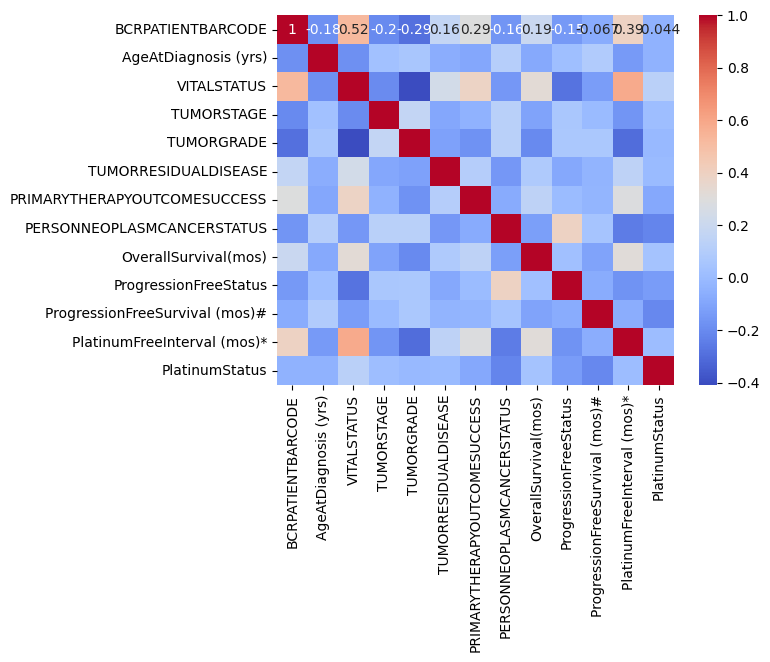

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


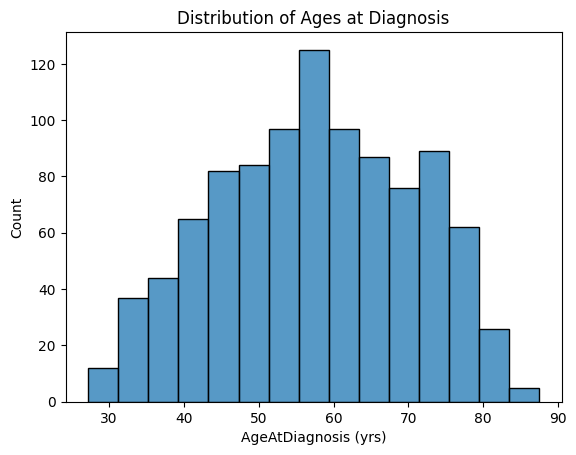

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


# Histogram
sns.histplot(df['AgeAtDiagnosis (yrs)'])
plt.title('Distribution of Ages at Diagnosis')
plt.show()



Categorical Columns: []
Numerical Columns: ['BCRPATIENTBARCODE', 'AgeAtDiagnosis (yrs)', 'VITALSTATUS', 'TUMORSTAGE', 'TUMORGRADE', 'TUMORRESIDUALDISEASE', 'PRIMARYTHERAPYOUTCOMESUCCESS', 'PERSONNEOPLASMCANCERSTATUS', 'OverallSurvival(mos)', 'ProgressionFreeStatus', 'ProgressionFreeSurvival (mos)#', 'PlatinumFreeInterval (mos)*', 'PlatinumStatus']


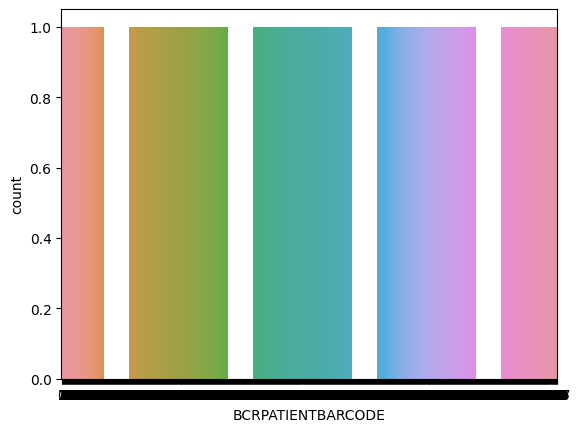

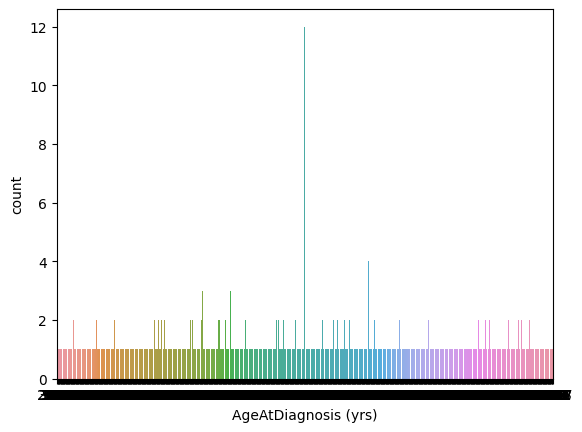

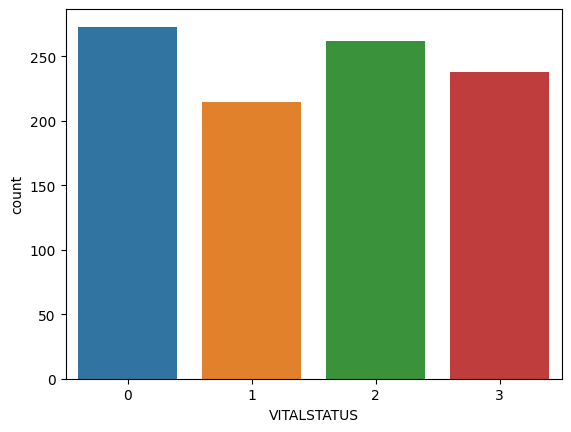

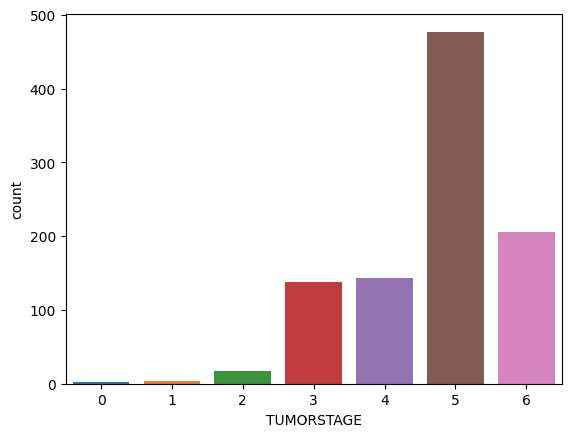

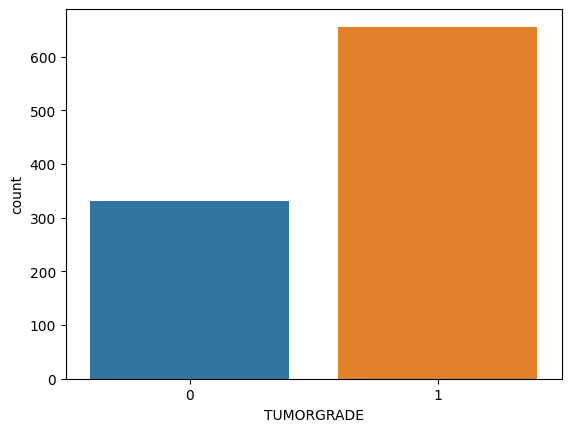

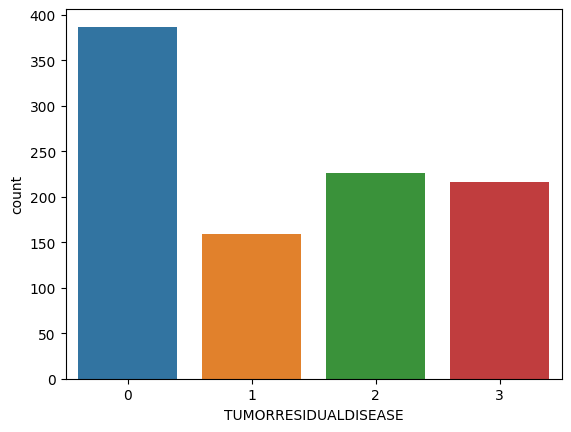

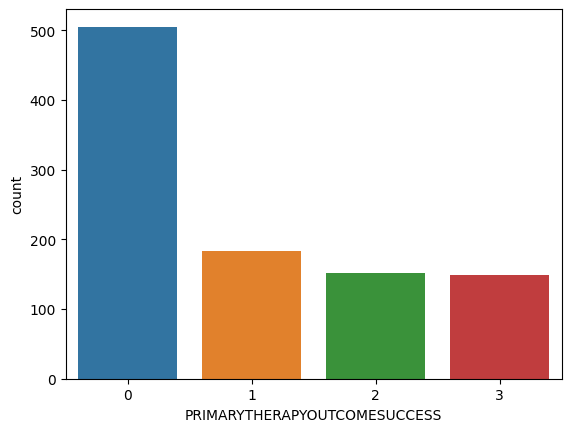

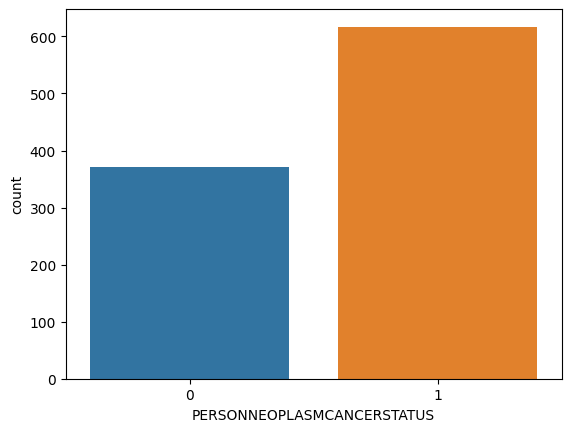

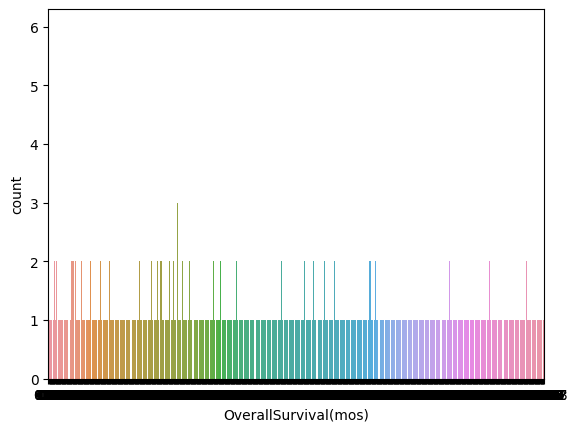

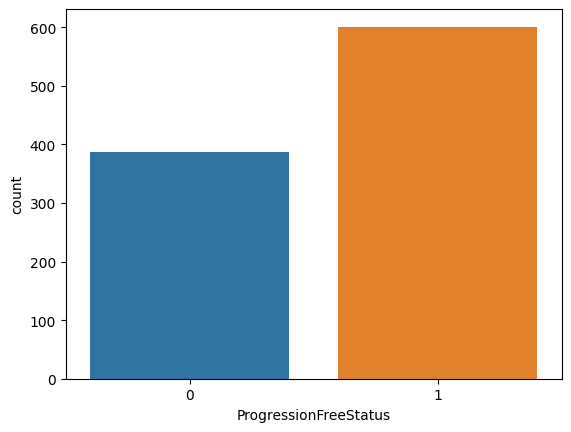

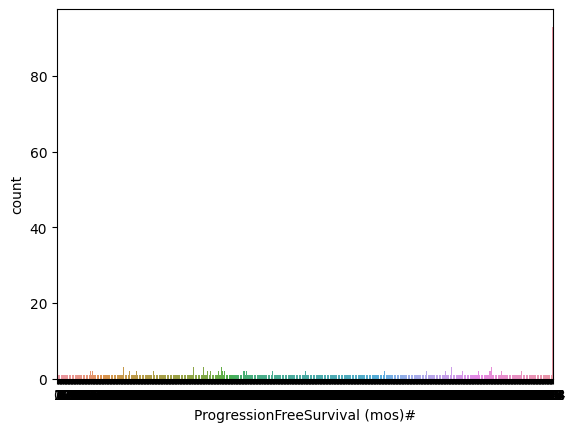

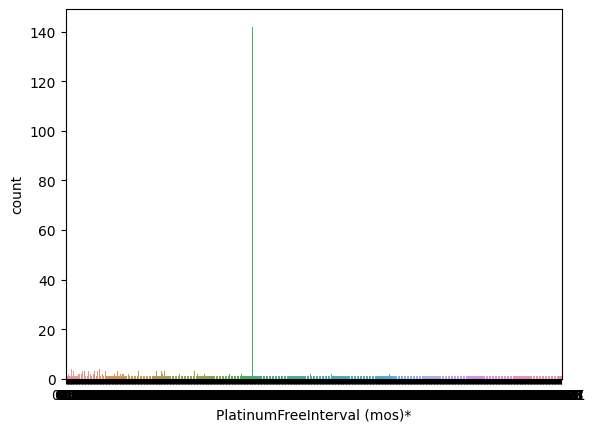

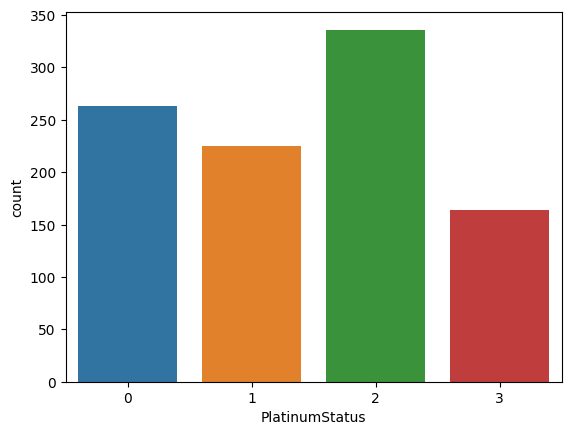

In [50]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Assuming df is your DataFrame
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numerical_cols}')

for column in df.columns:  # Replace with your categorical column list
    sns.countplot(data=df, x=column)
    plt.show()


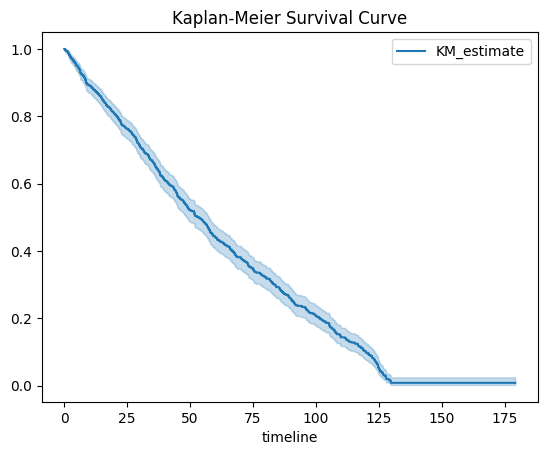

In [38]:
from lifelines import KaplanMeierFitter

# Define the Kaplan-Meier fitter object
kmf = KaplanMeierFitter()

# Fit the data to the Kaplan-Meier model
kmf.fit(durations = df['OverallSurvival(mos)'], event_observed = df['PlatinumStatus'])

# Plot the survival function estimate
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.show()


In [39]:
df.head()

,BCRPATIENTBARCODE,AgeAtDiagnosis (yrs),VITALSTATUS,TUMORSTAGE,TUMORGRADE,TUMORRESIDUALDISEASE,PRIMARYTHERAPYOUTCOMESUCCESS,PERSONNEOPLASMCANCERSTATUS,OverallSurvival(mos),ProgressionFreeStatus,ProgressionFreeSurvival (mos)#,PlatinumFreeInterval (mos)*,PlatinumStatus
0,732,52.21,1,4,1,3,3,0,1.54,0,43,NaN,3
1,179,62.21,1,5,1,3,0,0,2.56,0,293,NaN,3
2,273,63.32,1,2,1,0,0,1,0.52,0,35,NaN,3
3,226,46.47,1,6,1,3,0,0,2.62,0,294,NaN,3
4,147,48.72,1,5,1,0,0,0,6.59,0,589,NaN,3


In [40]:
# Random Forest Regressor

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('augmented_clinical_data.csv')

# Convert non-numeric entries to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Now you can use median imputation
data = data.fillna(data.median())

# Drop the columns with string values or that won't be used for this model 
data = data.drop(columns=['BCRPATIENTBARCODE', 'VITALSTATUS', 'TUMORRESIDUALDISEASE', 'PRIMARYTHERAPYOUTCOMESUCCESS', 'PERSONNEOPLASMCANCERSTATUS', 'ProgressionFreeStatus', 'PlatinumFreeInterval (mos)*', 'PlatinumStatus'])

# Encode categorical columns
le = LabelEncoder()
data['TUMORSTAGE'] = le.fit_transform(data['TUMORSTAGE'])
data['TUMORGRADE'] = le.fit_transform(data['TUMORGRADE'])

# Handle missing values (simple imputation with median)
data = data.fillna(data.median())

# Split data into features and target variable
X = data.drop(columns=['OverallSurvival(mos)', 'ProgressionFreeSurvival (mos)#'])
y = data['OverallSurvival(mos)']  # Or choose other target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model and fit it to the training data
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(X_test)

print(y_pred)



[ 76.4641      39.37958     69.6767      77.6621      42.45473333
  97.6503      17.72482679  52.4983      16.2536      78.6419
  46.47813333  25.1094      22.3427      71.3822      89.7052
  36.1384      33.3624      31.64022     52.8079      28.2219
  76.7516      19.3574      38.8744      46.6859      71.1786
  29.5172      21.6157      28.0747      45.9202      44.33004667
  50.58426     97.27506667  31.6329      33.83175     62.4976
  13.8088      72.9414      79.52885417  78.3628      57.3036
  28.5486      55.4764      21.6157      43.6837      40.0109
  81.6795      98.699675    65.0312      31.6626      30.3835
  27.91753333  57.58184548  63.8801      19.4511793   68.38899333
  19.4515      28.4643      23.9944      38.1643      49.9481
  37.5494      41.1508      79.40296667  39.9554      38.2536
  29.3254      56.32282667  71.9273      14.1429       8.3567
  19.4511793   14.6095      59.4615      18.5897      52.8599
  32.38879731  46.838       60.8788      51.9082      37.1

In [41]:
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Evaluate the model using Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')


R^2 Score: -0.45
Mean Squared Error: 2160.57
Mean Absolute Error: 36.56
Root Mean Squared Error: 46.48


In [42]:
# Gradient Boosting Regressor.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('augmented_clinical_data.csv')

# Convert non-numeric entries to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Now you can use median imputation
data = data.fillna(data.median())

# Drop the columns with string values or that won't be used for this model (e.g., barcode, vital status)
data = data.drop(columns=['BCRPATIENTBARCODE', 'VITALSTATUS', 'TUMORRESIDUALDISEASE', 'PRIMARYTHERAPYOUTCOMESUCCESS', 'PERSONNEOPLASMCANCERSTATUS', 'ProgressionFreeStatus', 'PlatinumFreeInterval (mos)*', 'PlatinumStatus'])

# Encode categorical columns
le = LabelEncoder()
data['TUMORSTAGE'] = le.fit_transform(data['TUMORSTAGE'])
data['TUMORGRADE'] = le.fit_transform(data['TUMORGRADE'])

# Handle missing values (simple imputation with median)
data = data.fillna(data.median())

# Split data into features and target variable
X = data.drop(columns=['OverallSurvival(mos)', 'ProgressionFreeSurvival (mos)#'])
y = data['OverallSurvival(mos)']  # Or choose other target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor model and fit it to the training data
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb.predict(X_test)
print(y_pred)


[46.77102302 42.33772269 43.22593716 59.94734329 43.22593716 75.52771823
 42.33772269 46.42296377 31.93693311 69.10750489 49.26079878 39.36622843
 42.33772269 66.09708292 65.11087114 43.22593716 35.06030185 37.81259947
 52.01455268 36.7047276  49.20700488 46.19646766 38.77949009 44.8600168
 56.67706224 43.22593716 46.42296377 38.89841061 51.54455783 42.33772269
 43.22593716 63.76104413 43.22593716 39.43335203 56.11182579 31.93693311
 46.77102302 65.13571804 49.20700488 51.54455783 49.30523231 54.43767445
 46.42296377 52.01455268 46.19646766 46.42296377 59.3165326  53.82202081
 37.02471753 45.4548933  46.84130893 46.0914547  47.76214276 34.7359016
 50.00531881 46.0914547  43.22593716 45.26901208 45.05442993 45.26901208
 46.77102302 46.0914547  43.22593716 42.33772269 46.42296377 41.32844397
 45.26901208 73.7798961  38.89841061 45.60109018 34.7359016  34.15821015
 58.24475061 38.77949009 51.11717916 47.76214276 46.84130893 47.27043924
 58.5059097  43.9152725  45.26901208 36.54359348 46.8

In [43]:
# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Evaluate the model using Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')


R^2 Score: -0.08
Mean Absolute Error: 32.18
Root Mean Squared Error: 40.09


In [44]:
# Support Vector Regression or SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load data
data = pd.read_csv('augmented_clinical_data.csv')

# Convert non-numeric entries to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Now you can use median imputation
data = data.fillna(data.median())

# Drop the columns with string values or that won't be used for this model (e.g., barcode, vital status)
data = data.drop(columns=['BCRPATIENTBARCODE', 'VITALSTATUS', 'TUMORRESIDUALDISEASE', 'PRIMARYTHERAPYOUTCOMESUCCESS', 'PERSONNEOPLASMCANCERSTATUS', 'ProgressionFreeStatus', 'PlatinumFreeInterval (mos)*', 'PlatinumStatus'])

# Encode categorical columns
le = LabelEncoder()
data['TUMORSTAGE'] = le.fit_transform(data['TUMORSTAGE'])
data['TUMORGRADE'] = le.fit_transform(data['TUMORGRADE'])

# Handle missing values (simple imputation with median)
data = data.fillna(data.median())

# Split data into features and target variable
X = data.drop(columns=['OverallSurvival(mos)', 'ProgressionFreeSurvival (mos)#'])
y = data['OverallSurvival(mos)']  # Or choose other target variable

# Standardize the data (important for SVR)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Regression model and fit it to the training data
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # You can adjust the parameters
svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svr.predict(X_test)
print(y_pred)



[38.4821187  38.73443575 35.20192054 47.33390264 35.0530975  38.45937453
 38.7000558  39.52395708 45.29349395 47.55467895 38.5461431  38.48148638
 38.67005985 46.05793565 47.86634596 35.73014844 36.61057819 45.55893715
 42.38418792 37.47646873 39.77287936 48.14085804 39.06959118 37.96424985
 47.63103587 35.56787366 39.59713469 36.08750988 38.17735038 38.73936346
 35.38802976 38.58403016 35.28298504 47.29838011 48.39335007 45.27285014
 38.48378249 48.40844769 39.82875889 38.12942675 48.13492575 38.48806057
 39.58539731 42.36351327 47.96043056 39.35479008 36.9857332  44.96685045
 36.52375117 44.70553769 40.37190449 38.49655916 38.91977231 38.85043591
 38.47563753 38.48821338 35.70673472 38.48260509 38.46097792 38.47963313
 38.48012386 38.50625584 35.6215215  38.66198326 39.5089024  34.60332063
 38.47683903 48.3114045  35.91960181 41.6999548  38.85043591 42.75382886
 48.59893811 38.9382397  48.25391964 38.85249414 40.05067896 36.73543229
 37.76209341 43.5110385  38.48002194 38.82825125 40

In [45]:
# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Evaluate the model using Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

R^2 Score: -0.08
Mean Absolute Error: 31.20
Root Mean Squared Error: 40.00


In [46]:
# XGBOOST
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load data
data = pd.read_csv('augmented_clinical_data.csv')

# Convert non-numeric entries to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Now you can use median imputation
data = data.fillna(data.median())

# Drop the columns with string values or that won't be used for this model (e.g., barcode, vital status)
data = data.drop(columns=['BCRPATIENTBARCODE', 'VITALSTATUS', 'TUMORRESIDUALDISEASE', 'PRIMARYTHERAPYOUTCOMESUCCESS', 'PERSONNEOPLASMCANCERSTATUS', 'ProgressionFreeStatus', 'PlatinumFreeInterval (mos)*', 'PlatinumStatus'])

# Encode categorical columns
le = LabelEncoder()
data['TUMORSTAGE'] = le.fit_transform(data['TUMORSTAGE'])
data['TUMORGRADE'] = le.fit_transform(data['TUMORGRADE'])

# Handle missing values (simple imputation with median)
data = data.fillna(data.median())

# Split data into features and target variable
X = data.drop(columns=['OverallSurvival(mos)', 'ProgressionFreeSurvival (mos)#'])
y = data['OverallSurvival(mos)']  # Or choose other target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor model and fit it to the training data
xgb = XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

print(y_pred)


[72.81677   40.344833  25.001568  75.106575  59.83178   92.410904
 34.925518  43.470512  23.637596  75.018074  60.964397  37.146423
 40.53371   66.47034   55.12716   28.445349  28.039612  28.506954
 58.436367  26.940414  59.989452  28.12701   27.532608  26.751383
 44.190018  64.135086  32.855614  41.546432  51.76315   40.344833
 40.061127  84.13286   25.001568  43.884556  52.95763   23.637596
 28.940378  81.15814   54.470833  71.42955   48.172764  66.96872
 32.855614  58.436367  55.12716   57.438892  66.68569   34.60141
 34.784378  32.404816  25.832361  44.602726  58.45159   23.323845
 32.71289   28.940378  28.445349  32.71289   92.410904  32.71289
 59.611217  50.215736  43.457024  45.469574  43.470512  26.582335
 32.71289   58.72604    8.029582  12.536561  23.323845  26.922785
 36.68636   36.53539   53.702965  57.360996  33.70054   61.322693
 61.22324   34.890102  32.71289   23.323845  47.134903  41.059036
 74.29407   64.84373   85.65584   28.940378  52.066765  28.039612
 25.832361  3

In [47]:
# Evaluate the model using R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.2f}')

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

# Evaluate the model using Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

R^2 Score: -0.34
Mean Absolute Error: 35.48
Root Mean Squared Error: 44.56


In [48]:
# Accuracy Comparision
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load and preprocess data
# ... (your data loading and preprocessing code here) ...

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector": SVR(),
    "XGBoost": XGBRegressor(objective ='reg:squarederror', random_state=42)
}

# Train models, make predictions, and evaluate
for model_name, model in models.items():
    # Fit model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{model_name} - R² Score: {r2:.2f}, Mean Absolute Error: {mae:.2f}, Root Mean Squared Error: {rmse:.2f}")



Random Forest - R² Score: -0.45, Mean Absolute Error: 36.56, Root Mean Squared Error: 46.48
Gradient Boosting - R² Score: -0.08, Mean Absolute Error: 32.18, Root Mean Squared Error: 40.09
Support Vector - R² Score: -0.07, Mean Absolute Error: 31.22, Root Mean Squared Error: 39.93
XGBoost - R² Score: -0.34, Mean Absolute Error: 35.48, Root Mean Squared Error: 44.56


Based on the given values of R² Score, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE), the Support Vector Machine (SVM) model seems to perform the best among the four models tested.

1. **R² Score** (Coefficient of Determination):
   - The R² score is a statistical measure of how well the regression predictions approximate the real data points. A higher R² score indicates a better fit for the data. Among the four models, SVM has the highest R² score of -0.07, though it's still a negative value which isn't ideal.

2. **Mean Absolute Error (MAE)**:
   - MAE is a measure of errors between paired observations expressing the same phenomenon. Lower values of MAE indicate better model performance. Among the four models, SVM has the lowest MAE of 31.22.

3. **Root Mean Squared Error (RMSE)**:
   - RMSE is the square root of the average of square differences between prediction and actual observation. Lower values of RMSE indicate better model performance. Among the four models, SVM also has the lowest RMSE of 39.93.

The SVM model appears to be the most accurate. However, it's important to note that the R² score is negative for all models, which indicates that all models are performing poorly. Usually, R² score ranges from 0 to 1, where a higher value (closer to 1) suggests a good model fit to the data.


# Conclusion:

The analysis of the given dataset of cancer patients reveals an intricate relationship between various clinical and demographic variables, such as age at diagnosis, tumor stage, tumor grade, therapy outcome, and the status of neoplasm cancer, on the overall survival and progression-free survival of individuals. It is observed that the majority of the patients are living, with varying degrees of tumor progression and therapeutic response. However, a considerable number of patients are in the 'Too early' category for the Platinum status, which suggests a need for further longitudinal follow-ups to better understand the platinum free interval and its implications.

The categorization of Tumor Residual Disease, although not uniform across the dataset, provides a significant insight into the extent of disease post-therapeutic interventions. The varying outcomes, ranging from complete response to stable disease, underscore the heterogeneity in therapeutic response among the patients.

Furthermore, the Progression-Free Survival (PFS) and Overall Survival (OS) columns, although populated with different scales of measurement (months), indicate the variance in survival rates among patients, which could potentially be linked to the tumor stage, grade, and the efficacy of the primary therapy administered.

In summary, the dataset provides a rich foundation for conducting more granular analysis to decipher patterns and correlations, which could be instrumental in formulating personalized treatment strategies for better patient outcomes. Further statistical analysis and perhaps the employment of machine learning algorithms could unearth patterns and predictive markers for therapy response and survival rates among cancer patients. This could be invaluable in advancing the field of oncology towards more personalized and effective therapeutic interventions.